# Dependency Extraction Comparison

In [20]:
import os

raw_ta_1 = "./source_raw_ta/dependencies_1.raw.ta"
raw_ta_2 = "./source_raw_ta/dependencies_2.raw.ta"
raw_ta_3 = "./source_raw_ta/dependencies_3.raw.ta"

dependencies = {}

def addDependency(dep, num):
  if dep in dependencies:
    dependencies[dep].append(num)
  else:
    dependencies[dep] = [num]

with open(raw_ta_1, 'r') as file:
  content = file.read()
  content_lines = content.replace('"', '').replace("\\", "/").split('\n')
  for line in content_lines:
    if "cLinks" in line:
      line = line.replace('java/org/apache', 'java/org/apache/flink') # Fix paths
      addDependency(line, 1)

with open(raw_ta_2, 'r') as file:
  content = file.read()
  content_lines = content.replace('"', '').replace("\\", "/").split('\n')
  for line in content_lines:
    if "cLinks" in line:
      addDependency(line, 2)

tech_1 = 0
tech_2 = 0
tech_12 = 0

for dep in dependencies:
  if 1 in dependencies[dep] and 2 in dependencies[dep]:
    tech_12 += 1
  elif 1 in dependencies[dep]:
    tech_1 += 1
  elif 2 in dependencies[dep]:
    tech_2 += 1
  
print("tech_1: ", tech_1)
print("tech_2: ", tech_2)
print("tech_12: ", tech_12)
  

tech_1:  36133
tech_2:  52195
tech_12:  6332


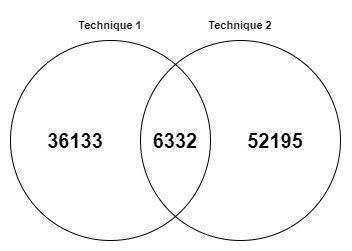